By Luis Serrano (based on Titanic - Project https://github.com/TarekDib03/titanic-EDA/blob/master/Titanic%20-%20Project.ipynb).

# Import Libraries

In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
import seaborn as sns
#from scipy import stats
from scipy.stats import kurtosis, kurtosistest
from scipy.stats import skew, skewtest
%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#https://stackoverflow.com/questions/52746279/how-to-get-absolutely-reproducible-results-with-scikit-learn
np.random.seed(4219)

# Reading Data Set using Pandas

In [28]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [29]:
credit = credit.rename(columns = {"default payment next month": "IN_DEFAULT"})

# Analysis

In [30]:
# Check the first 5 rows of the data frame
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IN_DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IN_DEFAULT'],
      dtype='object')

In [32]:
# Information about the data set
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID            30000 non-null int64
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
PAY_0         30000 non-null int64
PAY_2         30000 non-null int64
PAY_3         30000 non-null int64
PAY_4         30000 non-null int64
PAY_5         30000 non-null int64
PAY_6         30000 non-null int64
BILL_AMT1     30000 non-null int64
BILL_AMT2     30000 non-null int64
BILL_AMT3     30000 non-null int64
BILL_AMT4     30000 non-null int64
BILL_AMT5     30000 non-null int64
BILL_AMT6     30000 non-null int64
PAY_AMT1      30000 non-null int64
PAY_AMT2      30000 non-null int64
PAY_AMT3      30000 non-null int64
PAY_AMT4      30000 non-null int64
PAY_AMT5      30000 non-null int64
PAY_AMT6      30000 non-null int64
IN_DEFAULT    30000 non-null int64
dtypes: int64(25

In [33]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IN_DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [34]:
#Show mean values
print (credit.mean(numeric_only=True))

ID             15000.500000
LIMIT_BAL     167484.322667
SEX                1.603733
EDUCATION          1.853133
MARRIAGE           1.551867
AGE               35.485500
PAY_0             -0.016700
PAY_2             -0.133767
PAY_3             -0.166200
PAY_4             -0.220667
PAY_5             -0.266200
PAY_6             -0.291100
BILL_AMT1      51223.330900
BILL_AMT2      49179.075167
BILL_AMT3      47013.154800
BILL_AMT4      43262.948967
BILL_AMT5      40311.400967
BILL_AMT6      38871.760400
PAY_AMT1        5663.580500
PAY_AMT2        5921.163500
PAY_AMT3        5225.681500
PAY_AMT4        4826.076867
PAY_AMT5        4799.387633
PAY_AMT6        5215.502567
IN_DEFAULT         0.221200
dtype: float64


In [35]:
#Show median values
print (credit.median(numeric_only=True))

ID             15000.5
LIMIT_BAL     140000.0
SEX                2.0
EDUCATION          2.0
MARRIAGE           2.0
AGE               34.0
PAY_0              0.0
PAY_2              0.0
PAY_3              0.0
PAY_4              0.0
PAY_5              0.0
PAY_6              0.0
BILL_AMT1      22381.5
BILL_AMT2      21200.0
BILL_AMT3      20088.5
BILL_AMT4      19052.0
BILL_AMT5      18104.5
BILL_AMT6      17071.0
PAY_AMT1        2100.0
PAY_AMT2        2009.0
PAY_AMT3        1800.0
PAY_AMT4        1500.0
PAY_AMT5        1500.0
PAY_AMT6        1500.0
IN_DEFAULT         0.0
dtype: float64


In [36]:
#Show standard deviation
print (credit.std())

ID              8660.398374
LIMIT_BAL     129747.661567
SEX                0.489129
EDUCATION          0.790349
MARRIAGE           0.521970
AGE                9.217904
PAY_0              1.123802
PAY_2              1.197186
PAY_3              1.196868
PAY_4              1.169139
PAY_5              1.133187
PAY_6              1.149988
BILL_AMT1      73635.860576
BILL_AMT2      71173.768783
BILL_AMT3      69349.387427
BILL_AMT4      64332.856134
BILL_AMT5      60797.155770
BILL_AMT6      59554.107537
PAY_AMT1       16563.280354
PAY_AMT2       23040.870402
PAY_AMT3       17606.961470
PAY_AMT4       15666.159744
PAY_AMT5       15278.305679
PAY_AMT6       17777.465775
IN_DEFAULT         0.415062
dtype: float64


In [37]:
#Show value range
print (credit.max(numeric_only=True)-credit.min(numeric_only=True))

ID              29999
LIMIT_BAL      990000
SEX                 1
EDUCATION           6
MARRIAGE            3
AGE                58
PAY_0              10
PAY_2              10
PAY_3              10
PAY_4              10
PAY_5              10
PAY_6              10
BILL_AMT1     1130091
BILL_AMT2     1053708
BILL_AMT3     1821353
BILL_AMT4     1061586
BILL_AMT5     1008505
BILL_AMT6     1301267
PAY_AMT1       873552
PAY_AMT2      1684259
PAY_AMT3       896040
PAY_AMT4       621000
PAY_AMT5       426529
PAY_AMT6       528666
IN_DEFAULT          1
dtype: int64


In [38]:
my_columns = list (credit.columns.difference(["ID","IN_DEFAULT","EDUCATION","MARRIAGE","SEX"]))

In [39]:
print (credit [my_columns].quantile(np.array([0,.25,.50,.75,1])))

       AGE  BILL_AMT1  BILL_AMT2   BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0.00  21.0 -165580.00  -69777.00  -157264.00 -170000.00   -81334.0 -339603.00   
0.25  28.0    3558.75    2984.75     2666.25    2326.75     1763.0    1256.00   
0.50  34.0   22381.50   21200.00    20088.50   19052.00    18104.5   17071.00   
0.75  41.0   67091.00   64006.25    60164.75   54506.00    50190.5   49198.25   
1.00  79.0  964511.00  983931.00  1664089.00  891586.00   927171.0  961664.00   

      LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  PAY_AMT1  \
0.00    10000.0   -2.0   -2.0   -2.0   -2.0   -2.0   -2.0       0.0   
0.25    50000.0   -1.0   -1.0   -1.0   -1.0   -1.0   -1.0    1000.0   
0.50   140000.0    0.0    0.0    0.0    0.0    0.0    0.0    2100.0   
0.75   240000.0    0.0    0.0    0.0    0.0    0.0    0.0    5006.0   
1.00  1000000.0    8.0    8.0    8.0    8.0    8.0    8.0  873552.0   

       PAY_AMT2  PAY_AMT3   PAY_AMT4  PAY_AMT5   PAY_AMT6  
0.00        0.0       0.0 

In [40]:
# Massaron, L. & Mueller, J. (2015). Python for data science for dummies. Hoboken, NJ: John Wiley and Sons, Inc.
#
#✓ Skewness defines the asymmetry of data with respect to the mean. If the skew is negative,
#  the left tail is too long and the mass of the observations are on the right side of the distribution. 
#  If it is positive, it is exactly the opposite.
#✓ Kurtosis shows whether the data distribution, especially the peak and
#  the tails, are of the right shape. If the kurtosis is above zero, the distribution has a marked peak. 
#  If it is below zero, the distribution is too flat instead.
#
# When performing the kurtosis and skewness tests, you determine whether
# the p‐value is less than or equal 0.05. If so, you have to reject normality,
# which implies that you could obtain better results if you try to transform the
# variable into a normal one

for i in my_columns:
    s = skew(credit[i])
    zscore, pvalue = skewtest(credit[i])
    print ('** Skewness for %10s = %0.3f, z‐score = %0.3f and p‐value = %0.3f' % (i, s, zscore, pvalue))
    k = kurtosis(credit[i])
    zscore, pvalue = kurtosistest(credit[i])
    print ('   Kurtosis                = %0.3f, z‐score = %0.3f and p‐value = %0.3f' % (k, zscore, pvalue))

** Skewness for        AGE = 0.732, z‐score = 46.576 and p‐value = 0.000
   Kurtosis                = 0.044, z‐score = 1.547 and p‐value = 0.122
** Skewness for  BILL_AMT1 = 2.664, z‐score = 109.647 and p‐value = 0.000
   Kurtosis                = 9.804, z‐score = 71.811 and p‐value = 0.000
** Skewness for  BILL_AMT2 = 2.705, z‐score = 110.498 and p‐value = 0.000
   Kurtosis                = 10.301, z‐score = 72.818 and p‐value = 0.000
** Skewness for  BILL_AMT3 = 3.088, z‐score = 117.852 and p‐value = 0.000
   Kurtosis                = 19.780, z‐score = 85.211 and p‐value = 0.000
** Skewness for  BILL_AMT4 = 2.822, z‐score = 112.839 and p‐value = 0.000
   Kurtosis                = 11.307, z‐score = 74.694 and p‐value = 0.000
** Skewness for  BILL_AMT5 = 2.876, z‐score = 113.900 and p‐value = 0.000
   Kurtosis                = 12.304, z‐score = 76.365 and p‐value = 0.000
** Skewness for  BILL_AMT6 = 2.847, z‐score = 113.322 and p‐value = 0.000
   Kurtosis                = 12.268, z‐sco

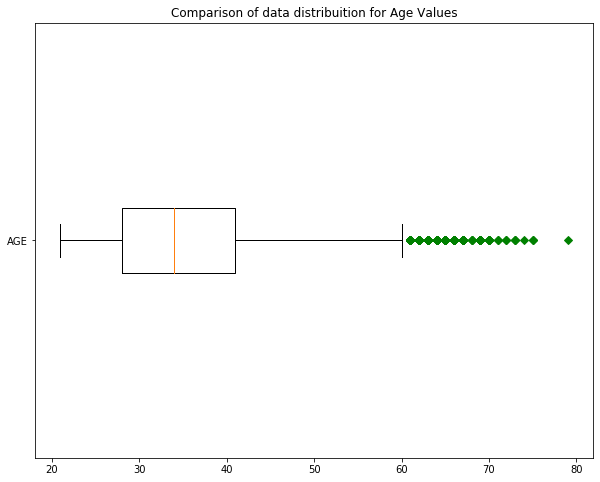

In [41]:
B = [credit['AGE']]
plt.boxplot(B,0,'gD'
            ,labels=['AGE']
            ,vert=False
            #,whis='range'
           )
plt.title('Comparison of data distribuition for Age Values')
plt.show()

In [42]:
credit.columns[5]

'AGE'

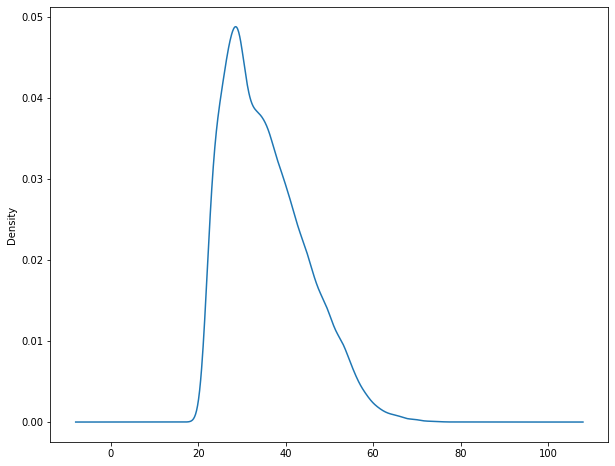

In [43]:
credit['AGE'].plot(kind='density')

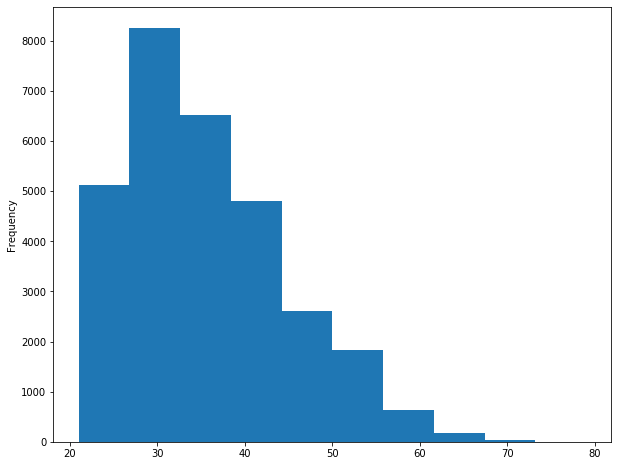

In [44]:
credit['AGE'].plot(kind='hist')

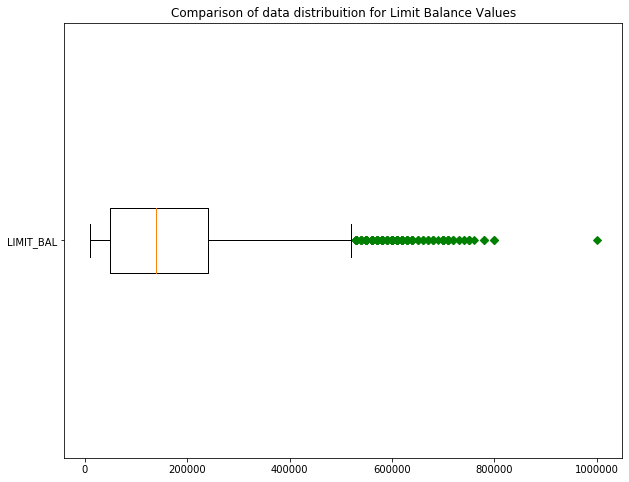

In [45]:
B = [credit['LIMIT_BAL']]
plt.boxplot(B,0,'gD'
            ,labels=['LIMIT_BAL']
            ,vert=False
            #,whis='range'
           )
plt.title('Comparison of data distribuition for Limit Balance Values')
plt.show()

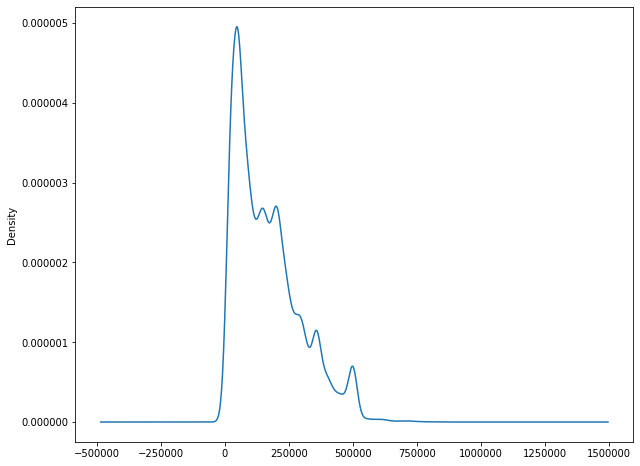

In [46]:
credit['LIMIT_BAL'].plot(kind='density')

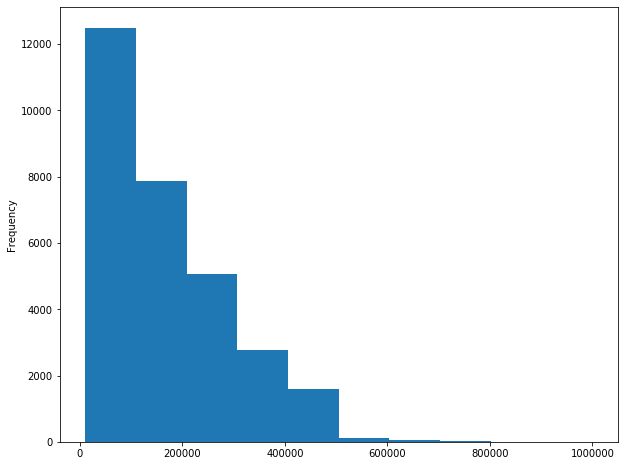

In [47]:
credit['LIMIT_BAL'].plot(kind='hist')

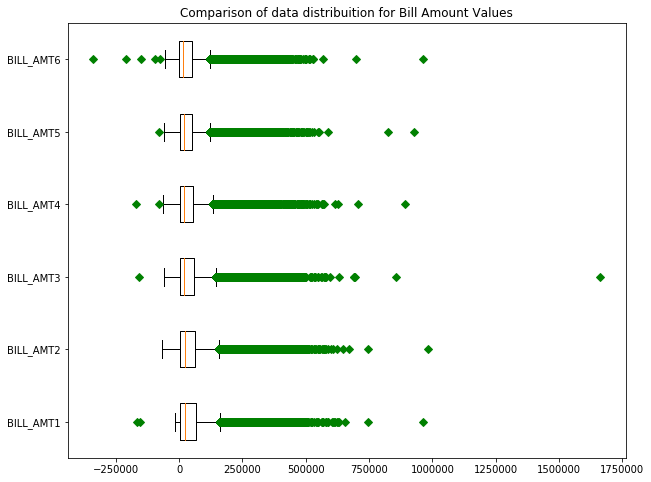

In [48]:
B = [credit['BILL_AMT1'],credit['BILL_AMT2'],credit['BILL_AMT3'],credit['BILL_AMT4'],credit['BILL_AMT5'],credit['BILL_AMT6']]
plt.boxplot(B,0,'gD'
            ,labels=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
            ,vert=False
            #,whis='range'
           )
plt.title('Comparison of data distribuition for Bill Amount Values')
plt.show()

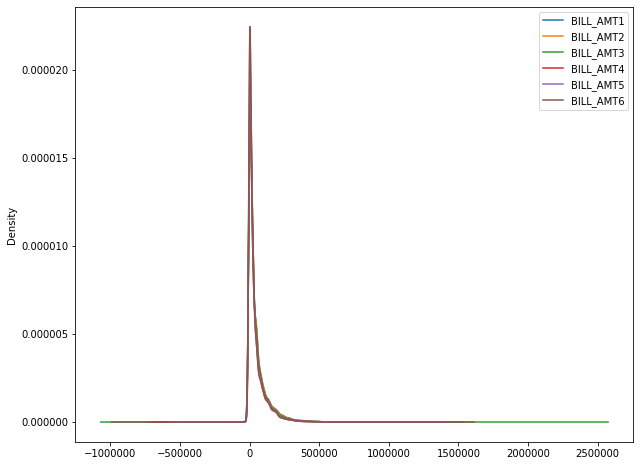

In [49]:
credit[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].plot(kind='density')

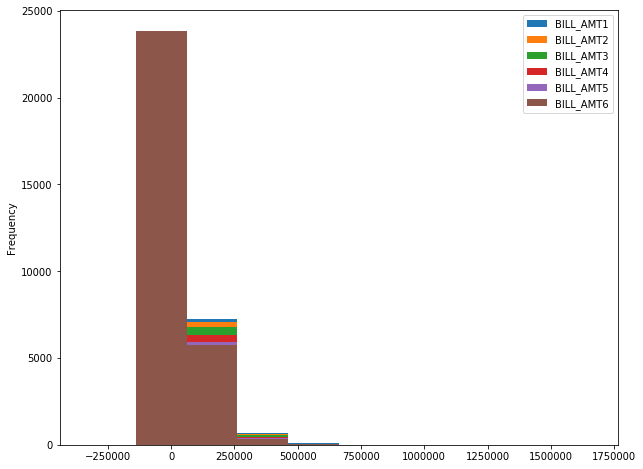

In [50]:
credit[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].plot(kind='hist')

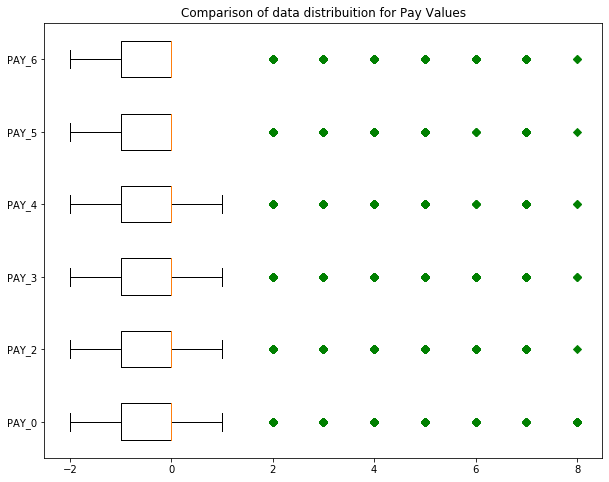

In [51]:
B = [credit['PAY_0'],credit['PAY_2'],credit['PAY_3'],credit['PAY_4'],credit['PAY_5'],credit['PAY_6']]
plt.boxplot(B,0,'gD'
            ,labels=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
            ,vert=False
            #,whis='range'
           )
plt.title('Comparison of data distribuition for Pay Values')
plt.show()

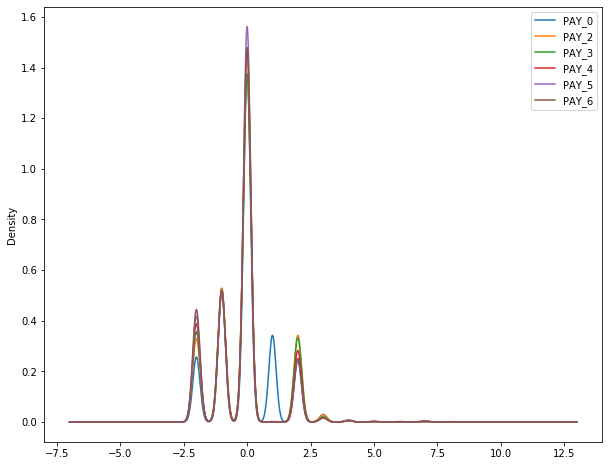

In [52]:
credit[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].plot(kind='density')

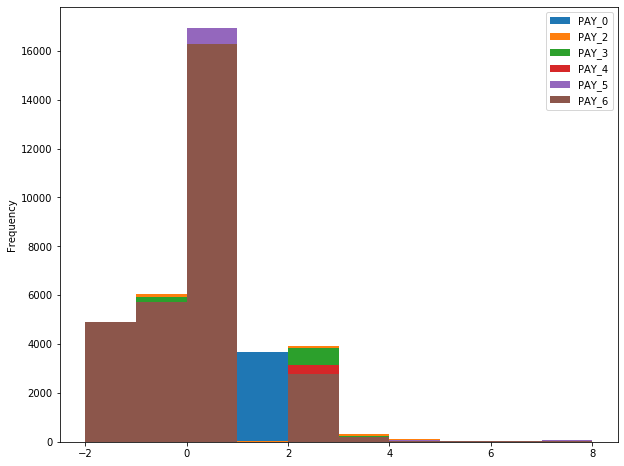

In [53]:
credit[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].plot(kind='hist')

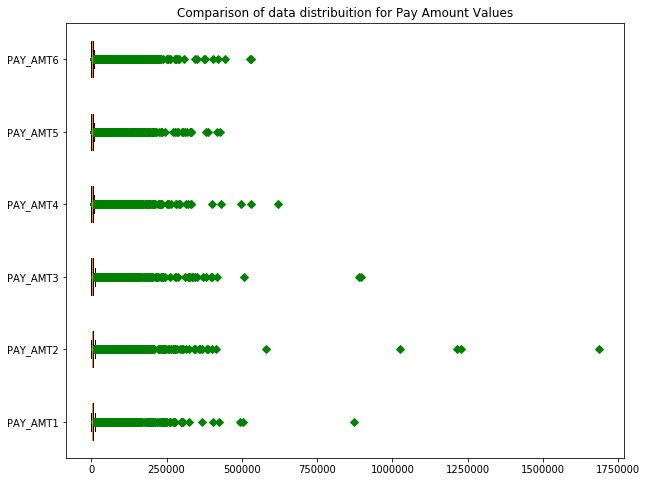

In [54]:
B = [credit['PAY_AMT1'],credit['PAY_AMT2'],credit['PAY_AMT3'],credit['PAY_AMT4'],credit['PAY_AMT5'],credit['PAY_AMT6']]
plt.boxplot(B,0,'gD'
            ,labels=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
            ,vert=False
            #,whis='range'
           )
plt.title('Comparison of data distribuition for Pay Amount Values')
plt.show()

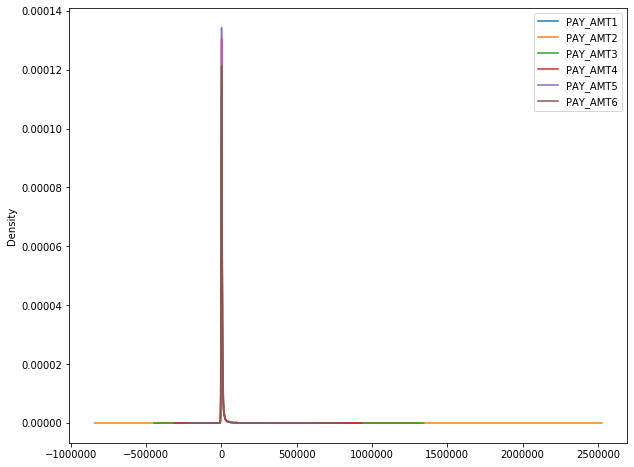

In [55]:
credit[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].plot(kind='density')

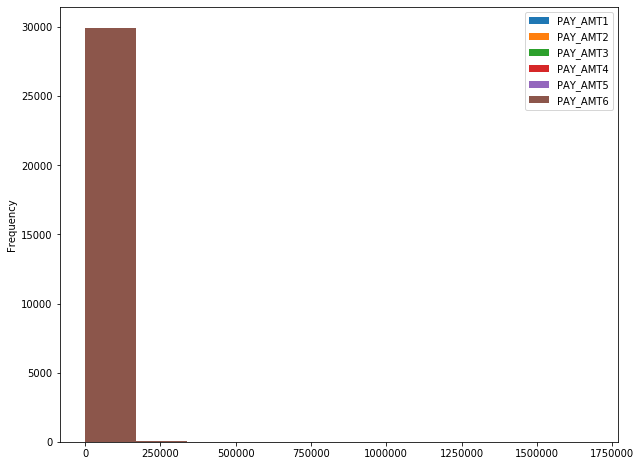

In [56]:
credit[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].plot(kind='hist')

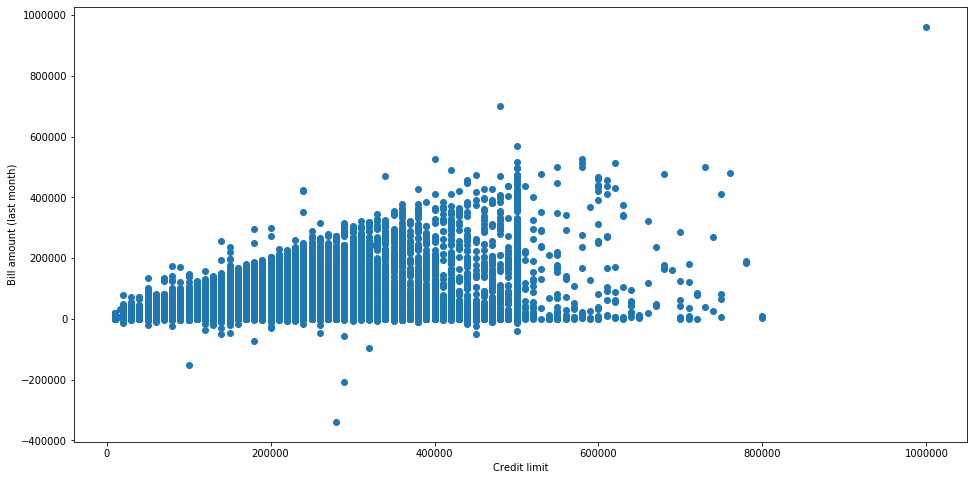

In [57]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(credit['LIMIT_BAL'], credit['BILL_AMT6'])
ax.set_xlabel('Credit limit')
ax.set_ylabel('Bill amount (last month)')
plt.show()

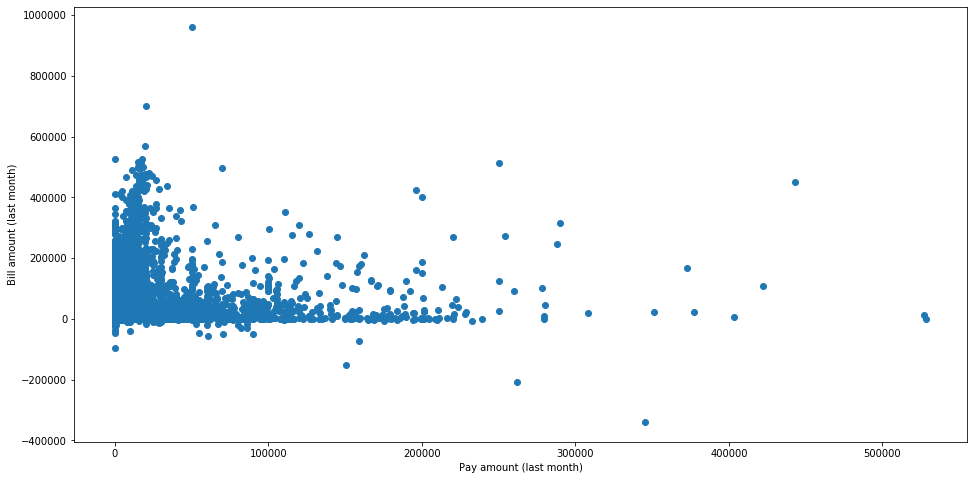

In [58]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(credit['PAY_AMT6'], credit['BILL_AMT6'])
ax.set_xlabel('Pay amount (last month)')
ax.set_ylabel('Bill amount (last month)')
plt.show()

In [7]:
# Number of customers by gender
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

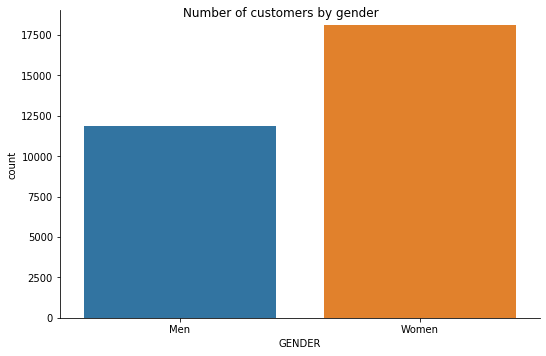

In [8]:
# Instead of a group by, use seaborn to plot the count of customers by gender
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.fig.suptitle('Number of customers by gender')
fg.set_xlabels('GENDER')
fg.set_xticklabels(["Men", "Women"])

In [9]:
# Number of customers by marital status
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

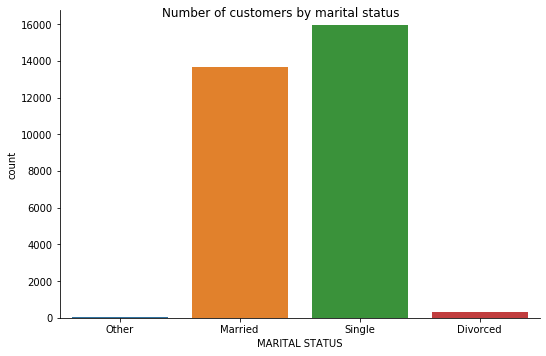

In [10]:
# Instead of a group by, use seaborn to plot the count of customers by marital status
fg = sns.catplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
fg.fig.suptitle('Number of customers by marital status')
fg.set_xlabels('MARITAL STATUS')
fg.set_xticklabels(["Other", "Married", "Single", "Divorced"])

In [11]:
# Number of customers by education
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

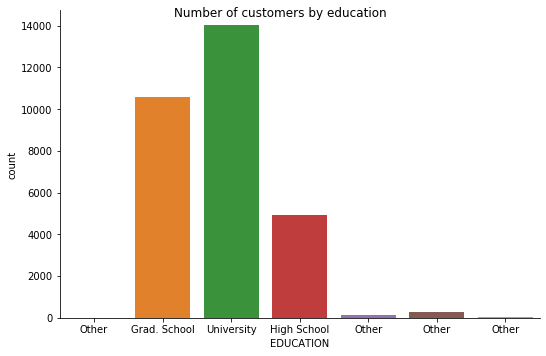

In [12]:
# Instead of a group by, use seaborn to plot the count of customers by education
fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.fig.suptitle('Number of customers by education')
fg.set_xlabels('EDUCATION')
fg.set_xticklabels(["Other", "Grad. School", "University", "High School", "Other", "Other", "Other"])

In [14]:
# Number of customers by gender and marital status
credit.groupby(['SEX', 'MARRIAGE'])['SEX'].count()

SEX  MARRIAGE
1    0             14
     1           5190
     2           6553
     3            131
2    0             40
     1           8469
     2           9411
     3            192
Name: SEX, dtype: int64

In [15]:
# Number of customers by gender and marital status
credit.pivot_table('IN_DEFAULT', 'SEX', 'MARRIAGE', aggfunc=len, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,14,5190,6553,131,11888
2,40,8469,9411,192,18112
All,54,13659,15964,323,30000


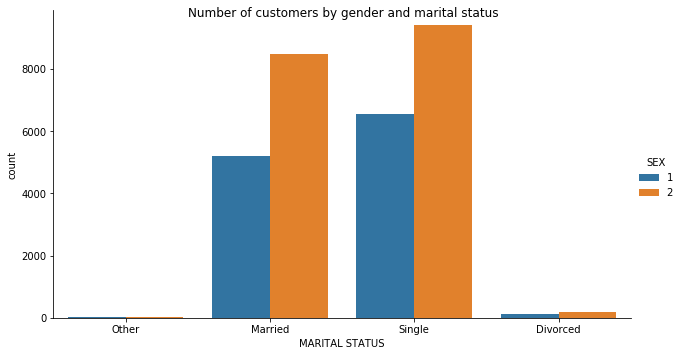

In [16]:
# Number of customers by gender and marital status
g = sns.catplot('MARRIAGE', data=credit, hue='SEX', kind='count', aspect=1.75)
g.fig.suptitle('Number of customers by gender and marital status')
g.set_xlabels('MARITAL STATUS')
g.set_xticklabels(["Other", "Married", "Single", "Divorced"])

In [17]:
# Number of customers by gender and education
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    0               8
     1            4354
     2            5374
     3            1990
     4              42
     5              95
     6              25
2    0               6
     1            6231
     2            8656
     3            2927
     4              81
     5             185
     6              26
Name: SEX, dtype: int64

In [18]:
# Number of customers by gender and education
credit.pivot_table('IN_DEFAULT', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,8,4354,5374,1990,42,95,25,11888
2,6,6231,8656,2927,81,185,26,18112
All,14,10585,14030,4917,123,280,51,30000


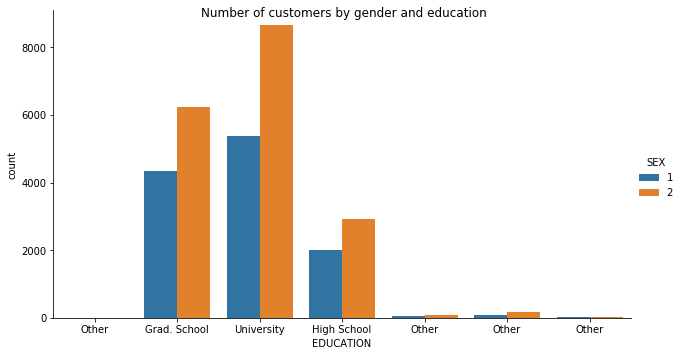

In [19]:
# Number of customers by gender and education
g = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
g.fig.suptitle('Number of customers by gender and education')
g.set_xlabels('EDUCATION')
g.set_xticklabels(["Other", "Grad. School", "University", "High School", "Other", "Other", "Other"])

In [20]:
corrMat = credit.corr()
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corrMat.style.background_gradient(cmap='coolwarm').set_precision(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IN_DEFAULT
ID,1,0.026,0.018,0.039,-0.029,0.019,-0.031,-0.011,-0.018,-0.0027,-0.022,-0.02,0.019,0.018,0.024,0.04,0.017,0.017,0.0097,0.0084,0.039,0.0078,0.00065,0.003,-0.014
LIMIT_BAL,0.026,1,0.025,-0.22,-0.11,0.14,-0.27,-0.3,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.3,0.29,0.2,0.18,0.21,0.2,0.22,0.22,-0.15
SEX,0.018,0.025,1,0.014,-0.031,-0.091,-0.058,-0.071,-0.066,-0.06,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0.00024,-0.0014,-0.0086,-0.0022,-0.0017,-0.0028,-0.04
EDUCATION,0.039,-0.22,0.014,1,-0.14,0.18,0.11,0.12,0.11,0.11,0.098,0.082,0.024,0.019,0.013,-0.00045,-0.0076,-0.0091,-0.037,-0.03,-0.04,-0.038,-0.04,-0.037,0.028
MARRIAGE,-0.029,-0.11,-0.031,-0.14,1,-0.41,0.02,0.024,0.033,0.033,0.036,0.034,-0.023,-0.022,-0.025,-0.023,-0.025,-0.021,-0.006,-0.0081,-0.0035,-0.013,-0.0012,-0.0066,-0.024
AGE,0.019,0.14,-0.091,0.18,-0.41,1,-0.039,-0.05,-0.053,-0.05,-0.054,-0.049,0.056,0.054,0.054,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014
PAY_0,-0.031,-0.27,-0.058,0.11,0.02,-0.039,1,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.079,-0.07,-0.071,-0.064,-0.058,-0.059,0.32
PAY_2,-0.011,-0.3,-0.071,0.12,0.024,-0.05,0.67,1,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.26
PAY_3,-0.018,-0.29,-0.066,0.11,0.033,-0.053,0.57,0.77,1,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.0013,-0.067,-0.053,-0.046,-0.036,-0.036,0.24
PAY_4,-0.0027,-0.27,-0.06,0.11,0.033,-0.05,0.54,0.66,0.78,1,0.82,0.72,0.2,0.23,0.24,0.25,0.24,0.24,-0.0094,-0.0019,-0.069,-0.043,-0.034,-0.027,0.22


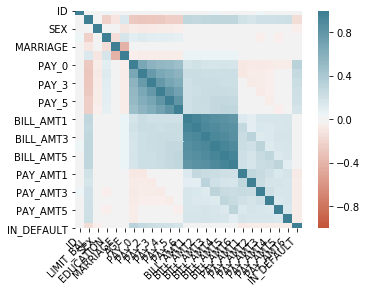

In [21]:
#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
ax = sns.heatmap(
    corrMat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [22]:
# Customers in default and not in default grouped by marital status, education, and gender
table = pd.crosstab(index=[credit.IN_DEFAULT,credit.MARRIAGE], columns=[credit.SEX,credit.EDUCATION])

In [23]:
table.unstack()

SEX         1                                       ...   2                   \
EDUCATION   0           1                  2        ...   4     5              
MARRIAGE    0  1  2  3  0     1     2   3  0     1  ...   2  3  0   1   2  3   
IN_DEFAULT                                          ...                        
0           0  2  6  0  1  1300  2127  20  1  1727  ...  43  2  0  97  74  2   
1           0  0  0  0  0   390   506  10  0   643  ...   2  0  0   5   7  0   

SEX                      
EDUCATION   6            
MARRIAGE    0   1  2  3  
IN_DEFAULT               
0           0  13  7  2  
1           0   1  3  0  

[2 rows x 56 columns]

In [24]:
#https://stackoverflow.com/questions/38931566/pandas-style-background-gradient-both-rows-and-columns
def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [25]:
# Customers in default and not in default grouped by marital status, education, and sex (better look)
# Change name of columns and apply EXCEL style color gradient
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(["Other1", "Grad. School", "University", "High School", "Other2", "Other3", "Other4"]\
                         , level=1, inplace=True)
table.style.apply(background_gradient,
               cmap='Oranges', #cmap='PuBu', # https://matplotlib.org/examples/color/colormaps_reference.html
               m=table.min().min(),
               M=table.max().max(),
               low=0,
               high=0.2)

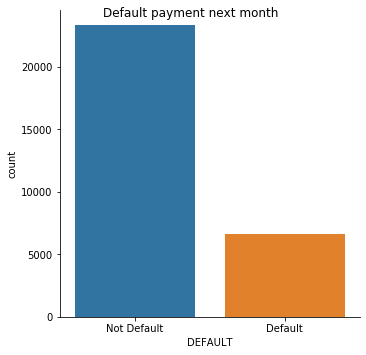

In [26]:
# Factor plot default vs not in default
g = sns.catplot('IN_DEFAULT', data=credit, kind='count')
g.fig.suptitle('Default payment next month')
g.set_xlabels('DEFAULT')
g.set_xticklabels(["Not Default", "Default"])

In [27]:
in_default = credit[credit['IN_DEFAULT']==1]

In [28]:
len(in_default)

6636

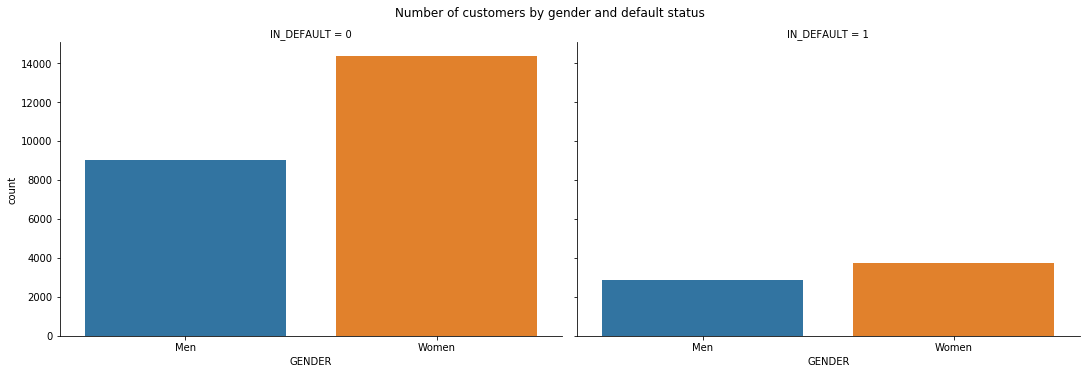

In [29]:
# Number of customers by gender and default status
fg = sns.catplot('SEX', col="IN_DEFAULT", data=credit, kind='count', aspect=1.5)
fg.fig.suptitle('Number of customers by gender and default status',y=1.03)
fg.set_xlabels('GENDER')
fg.set_xticklabels(["Men", "Women"])

In [30]:
# Number of customers by gender and default status
credit.pivot_table(index=["IN_DEFAULT"], columns=["SEX"], values=["ID"], aggfunc=len, margins=True)

ID              
SEX             1      2    All
IN_DEFAULT                     
0            9015  14349  23364
1            2873   3763   6636
All         11888  18112  30000

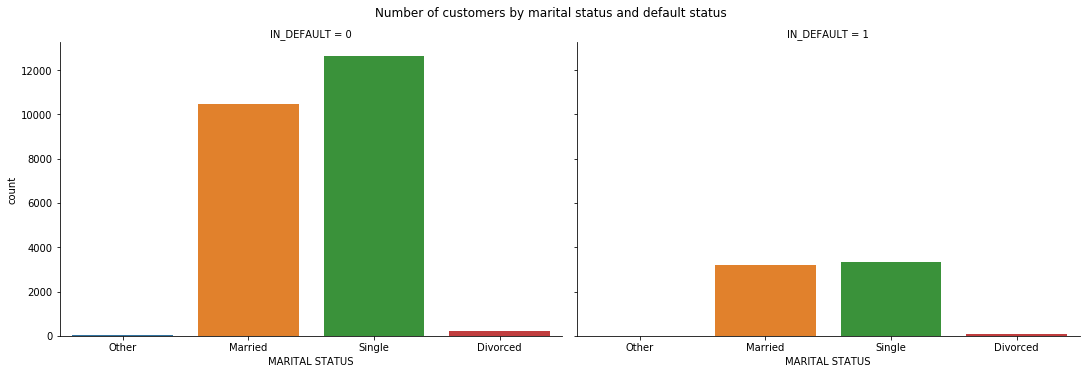

In [31]:
fg = sns.catplot('MARRIAGE', col="IN_DEFAULT", data=credit, kind='count', aspect=1.5)
fg.fig.suptitle('Number of customers by marital status and default status',y=1.03)
fg.set_xlabels('MARITAL STATUS')
fg.set_xticklabels(["Other", "Married", "Single", "Divorced"])

In [32]:
# Number of customers by marital status and default status
credit.pivot_table(index=["IN_DEFAULT"], columns=["MARRIAGE"], values=["ID"], aggfunc=len, margins=True)

ID                          
MARRIAGE     0      1      2    3    All
IN_DEFAULT                              
0           49  10453  12623  239  23364
1            5   3206   3341   84   6636
All         54  13659  15964  323  30000

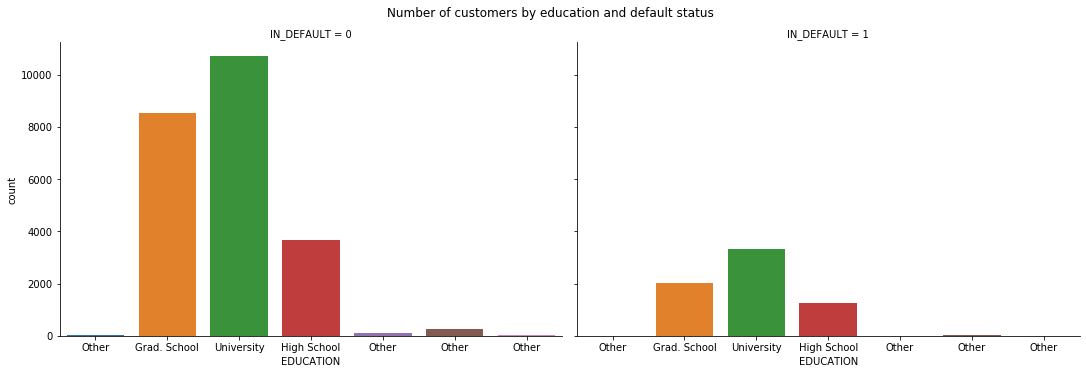

In [33]:
fg = sns.catplot('EDUCATION', col="IN_DEFAULT", data=credit, kind='count', aspect=1.5)
fg.fig.suptitle('Number of customers by education and default status',y=1.03)
fg.set_xlabels('EDUCATION')
fg.set_xticklabels(["Other", "Grad. School", "University", "High School", "Other", "Other", "Other"])

In [34]:
# Number of customers by education and default status
credit.pivot_table(index=["IN_DEFAULT"], columns=["EDUCATION"], values=["ID"], aggfunc=len, margins=True)

ID                                                     
EDUCATION      0        1        2       3      4      5     6    All
IN_DEFAULT                                                           
0           14.0   8549.0  10700.0  3680.0  116.0  262.0  43.0  23364
1            NaN   2036.0   3330.0  1237.0    7.0   18.0   8.0   6636
All         14.0  10585.0  14030.0  4917.0  123.0  280.0  51.0  30000

In [35]:
# Percentage of customers in default (by gender)
SEX_percentages = (in_default.groupby("SEX")["IN_DEFAULT"].count()*100)\
                  .div(credit.groupby("SEX")["IN_DEFAULT"].count()).to_frame().reset_index()

In [36]:
SEX_percentages

,SEX,IN_DEFAULT
0,1,24.167227
1,2,20.776281


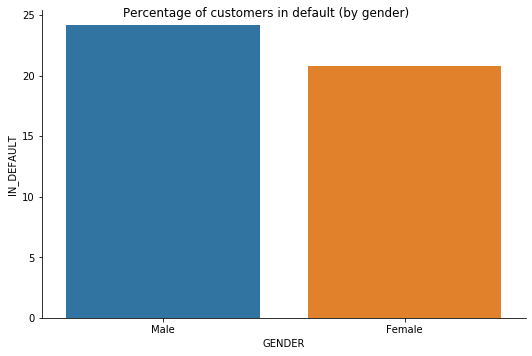

In [37]:
# Plot of percentage of customers in default (by gender) 
fg = sns.catplot(x="SEX", y="IN_DEFAULT", kind="bar", data=SEX_percentages, aspect=1.5)
fg.fig.suptitle('Percentage of customers in default (by gender)')
fg.set_xlabels('GENDER')
fg.set_xticklabels(["Male", "Female"])

In [38]:
# Percentage of customers in default (by marital status)
MARRIAGE_percentages = (in_default.groupby("MARRIAGE")["IN_DEFAULT"].count()*100)\
                       .div(credit.groupby("MARRIAGE")["IN_DEFAULT"].count()).to_frame().reset_index()

In [39]:
MARRIAGE_percentages

,MARRIAGE,IN_DEFAULT
0,0,9.259259
1,1,23.471704
2,2,20.928339
3,3,26.006192


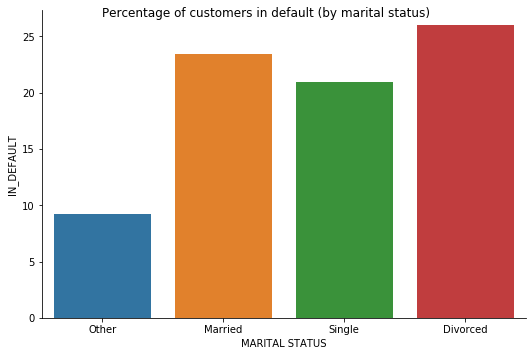

In [40]:
# Plot of percentage of customers in default (by marital status) 
fg = sns.catplot(x="MARRIAGE", y="IN_DEFAULT", kind="bar", data=MARRIAGE_percentages, aspect=1.5)
fg.fig.suptitle('Percentage of customers in default (by marital status)')
fg.set_xlabels('MARITAL STATUS')
fg.set_xticklabels(["Other", "Married", "Single", "Divorced"])

In [41]:
# Percentage of customers in default (by education)
EDUCATION_percentages = (in_default.groupby("EDUCATION")["IN_DEFAULT"].count()*100)\
                        .div(credit.groupby("EDUCATION")["IN_DEFAULT"].count()).to_frame().reset_index()

In [42]:
EDUCATION_percentages

,EDUCATION,IN_DEFAULT
0,0,NaN
1,1,19.234766
2,2,23.734854
3,3,25.157616
4,4,5.691057
5,5,6.428571
6,6,15.686275


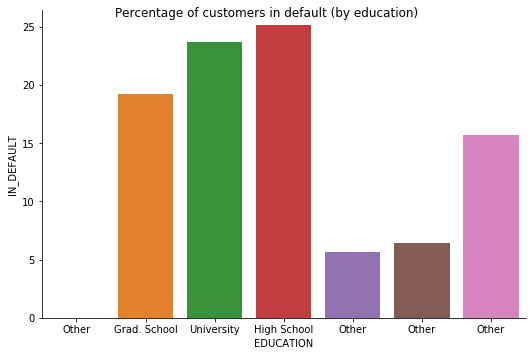

In [43]:
# Plot of percentage of customers in default (by education) 
fg = sns.catplot(x="EDUCATION", y="IN_DEFAULT", kind="bar", data=EDUCATION_percentages, aspect=1.5)
fg.fig.suptitle('Percentage of customers in default (by education)')
fg.set_xlabels('EDUCATION')
fg.set_xticklabels(["Other", "Grad. School", "University", "High School", "Other", "Other", "Other"])

In [44]:
print('Average, median and mode age of total customers are %0.f, %0.f and %0.f years old, respectively'%(credit.AGE.mean(), 
                                                                          credit.AGE.median(),credit.AGE.mode()))

Average, median and mode age of total customers are 35, 34 and 29 years old, respectively


In [45]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [46]:
print('Average, median, and mode age of customers in default are %0.f, %0.f and %0.f years old, respectively'
      %(in_default.AGE.mean(), in_default.AGE.median(), in_default.AGE.mode()[0]))

Average, median, and mode age of customers in default are 36, 34 and 27 years old, respectively


In [47]:
in_default.AGE.describe()

count    6636.000000
mean       35.725738
std         9.693438
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Distribution of Customer by age')

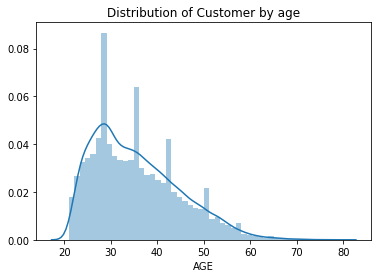

In [48]:
# Distribution of age, with an overlay of a density plot
age_dist_all = sns.distplot(credit.AGE)
age_dist_all.set_title("Distribution of Customer by age")

Text(0.5, 1.0, 'Distribution of Customer in default by age')

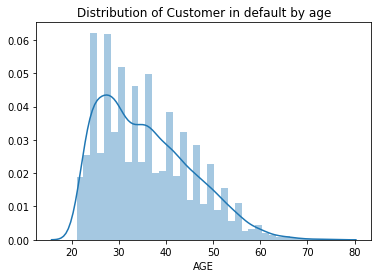

In [49]:
age_dist_def = sns.distplot(in_default.AGE)
age_dist_def.set_title("Distribution of Customer in default by age")

In [50]:
# Create a function to define group age
def get_groupage(customer):
    age = customer
    
    if age < 12:
        return 'child'
    elif age < 20:
        return 'adolescent'
    elif age < 40:
        return 'young'
    elif age < 65:
        return 'adult'    
    else:
        return 'elder'

In [51]:
credit['person'] = credit['AGE'].apply(get_groupage)

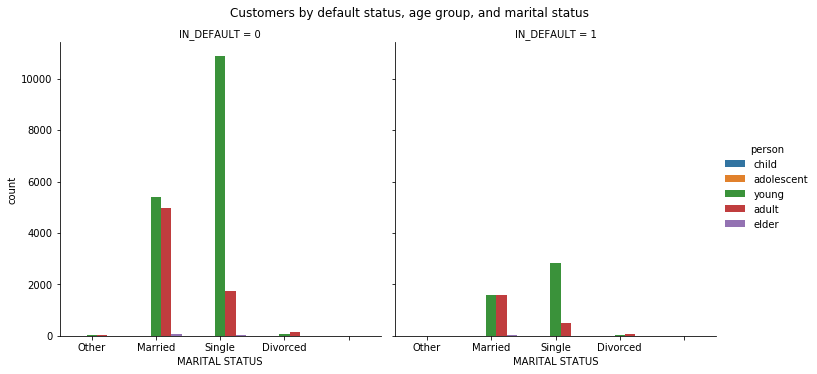

In [52]:
# Customers by default status, age group, and marital status
cp = sns.catplot('MARRIAGE', col="IN_DEFAULT", data=credit, kind='count', hue='person', order=[0,1,2,3,4], 
               hue_order=['child','adolescent','young','adult','elder'], aspect=1)
cp.fig.suptitle('Customers by default status, age group, and marital status',y=1.03)
cp.set_xlabels('MARITAL STATUS')
cp.set_xticklabels(["Other", "Married", "Single", "Divorced"])

In [53]:
# Customers by default status, age group and marital status
t_marital = pd.crosstab(index=[credit.IN_DEFAULT, credit.person], columns=[credit.MARRIAGE])
t_marital.columns = ["Other", "Married", "Single", "Divorced"]
t_marital

Other  Married  Single  Divorced
IN_DEFAULT person                                  
0          adult      19     4984    1744       152
           elder       0       68      13         1
           young      30     5401   10866        86
1          adult       3     1584     488        60
           elder       0       25       3         0
           young       2     1597    2850        24

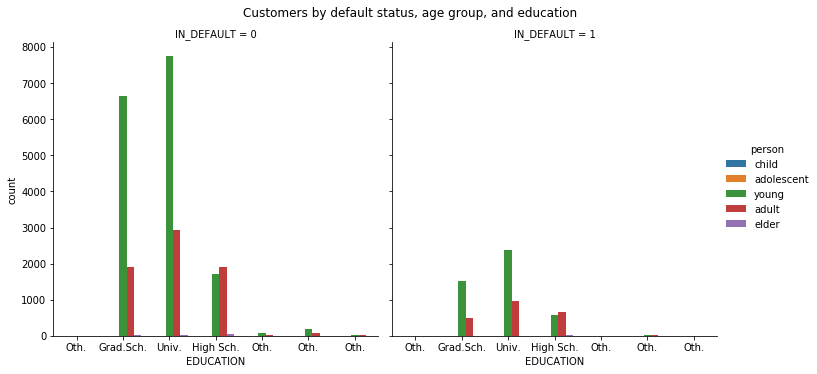

In [54]:
# Customers by default status, age group, and education
cp = sns.catplot('EDUCATION', col="IN_DEFAULT", data=credit, kind='count', hue='person', order=[0,1,2,3,4,5,6], 
               hue_order=['child','adolescent','young','adult','elder'], aspect=1)
cp.fig.suptitle('Customers by default status, age group, and education',y=1.03)
cp.set_xlabels('EDUCATION')
cp.set_xticklabels(["Oth.", "Grad.Sch.", "Univ.", "High Sch.", "Oth.", "Oth.", "Oth."])

In [55]:
# Customers by default status, age group and education
t_age = pd.crosstab(index=[credit.IN_DEFAULT, credit.person], columns=[credit.EDUCATION])
t_age.columns = ["Other", "Grad. School", "University", "High School", "Other", "Other", "Other"]
t_age

Other  Grad. School  University  High School  Other  Other  \
IN_DEFAULT person                                                               
0          adult       6          1898        2939         1916     30     82   
           elder       0            21          20           39      0      0   
           young       8          6630        7741         1725     86    180   
1          adult       0           503         955          659      2      9   
           elder       0             8           8           12      0      0   
           young       0          1525        2367          566      5      9   

                   Other  
IN_DEFAULT person         
0          adult      28  
           elder       2  
           young      13  
1          adult       7  
           elder       0  
           young       1

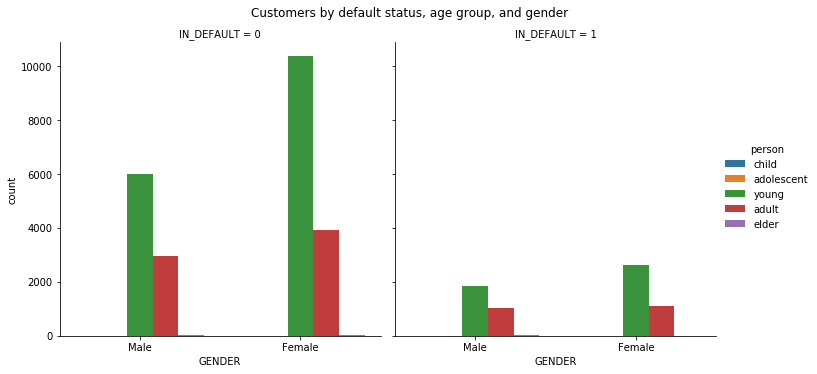

In [56]:
# Customers by default status, age group, and gender
cp = sns.catplot('SEX', col="IN_DEFAULT", data=credit, kind='count', hue='person', order=[1,2], 
               hue_order=['child','adolescent','young','adult','elder'], aspect=1)
cp.fig.suptitle('Customers by default status, age group, and gender',y=1.03)
cp.set_xlabels('GENDER')
cp.set_xticklabels(["Male", "Female"])

In [57]:
# Customers by default status, age group and gender
t_gender = pd.crosstab(index=[credit.IN_DEFAULT, credit.person], columns=[credit.SEX])
t_gender.columns = ["Male", "Female"]
t_gender

Male  Female
IN_DEFAULT person              
0          adult   2965    3934
           elder     43      39
           young   6007   10376
1          adult   1017    1118
           elder     17      11
           young   1839    2634

In [58]:
# Total number of costumers by age group
credit['person'].value_counts()

young    20856
adult     9034
elder      110
Name: person, dtype: int64

In [59]:
# Create a function to define group age
def get_creditcat(customer):
    limitbal = customer
    
    if limitbal < 100000:
        return 'class10'
    elif limitbal < 200000:
        return 'class9'
    elif limitbal < 300000:
        return 'class8'
    elif limitbal < 400000:
        return 'class7'
    elif limitbal < 500000:
        return 'class6'
    elif limitbal < 600000:
        return 'class5'
    elif limitbal < 700000:
        return 'class4'
    elif limitbal < 800000:
        return 'class3'
    elif limitbal < 900000:
        return 'class2'    
    else:
        return 'class1'

In [60]:
credit['creditclass'] = credit['LIMIT_BAL'].apply(get_creditcat)

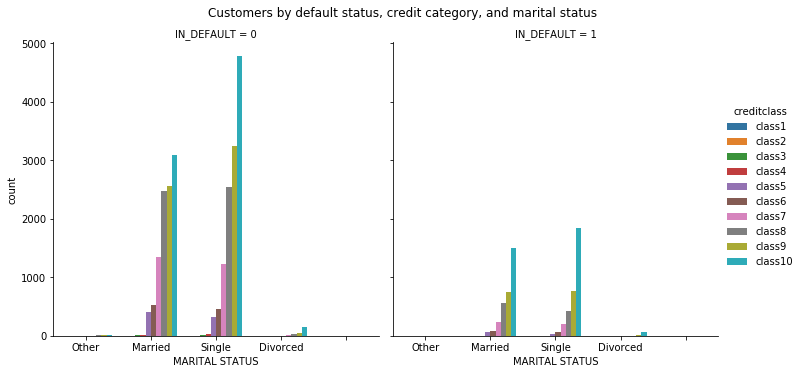

In [61]:
# Customers by default status, credit category, and marital status
cp = sns.catplot('MARRIAGE', col="IN_DEFAULT", data=credit, kind='count', hue='creditclass', order=[0,1,2,3,4], 
               hue_order=['class1','class2','class3','class4','class5','class6','class7','class8','class9','class10'],
               aspect=1)
cp.fig.suptitle('Customers by default status, credit category, and marital status', y=1.03)
cp.set_xlabels('MARITAL STATUS')
cp.set_xticklabels(["Other", "Married", "Single", "Divorced"])

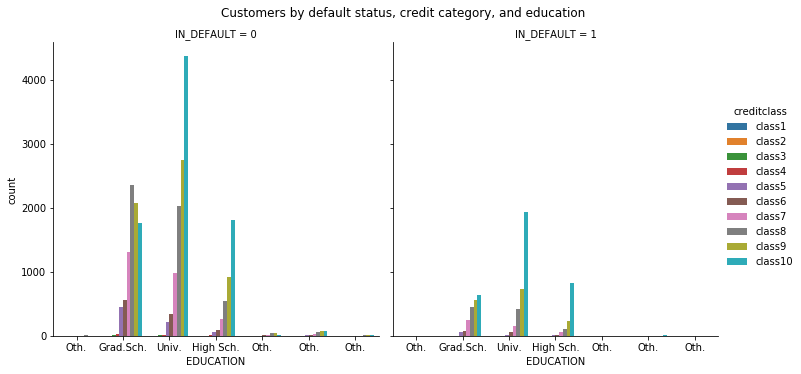

In [62]:
# Customers by default status, credit category, and education
cp = sns.catplot('EDUCATION', col="IN_DEFAULT", data=credit, kind='count', hue='creditclass', order=[0,1,2,3,4,5,6], 
               hue_order=['class1','class2','class3','class4','class5','class6','class7','class8','class9','class10'],
                 aspect=1)
cp.fig.suptitle('Customers by default status, credit category, and education',y=1.03)
cp.set_xlabels('EDUCATION')
cp.set_xticklabels(["Oth.", "Grad.Sch.", "Univ.", "High Sch.", "Oth.", "Oth.", "Oth."])

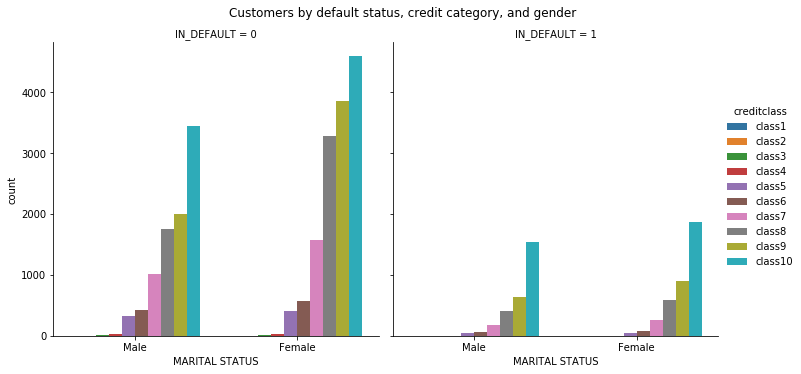

In [63]:
# Customers by default status, credit category, and gender
cp = sns.catplot('SEX', col="IN_DEFAULT", data=credit, kind='count', hue='creditclass', order=[1,2], 
               hue_order=['class1','class2','class3','class4','class5','class6','class7','class8','class9','class10'],
                 aspect=1)
cp.fig.suptitle('Customers by default status, credit category, and gender',y=1.03)
cp.set_xlabels('MARITAL STATUS')
cp.set_xticklabels(["Male", "Female"])

In [64]:
# Number of customers by credit category
credit['creditclass'].value_counts()

class10    11450
class9      7400
class8      6033
class7      3042
class6      1147
class5       833
class4        64
class3        28
class2         2
class1         1
Name: creditclass, dtype: int64

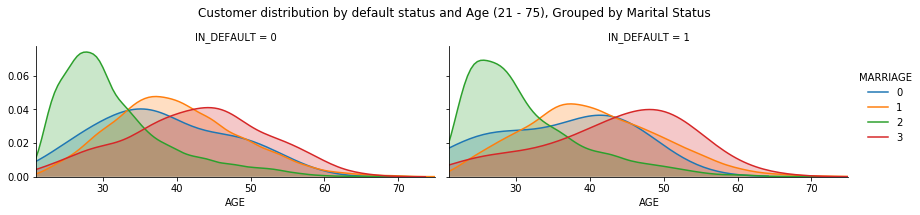

In [65]:
fg = sns.FacetGrid(data=credit, col="IN_DEFAULT", hue='MARRIAGE', aspect=2)
fg.map(sns.kdeplot, 'AGE', shade=True)
youngest = in_default['AGE'].min()
oldest = in_default['AGE'].max()
fg.set(xlim=(youngest,oldest))
#fg.set(title='Customer distribution by default status and Age, Grouped by Marital Status')
plt.subplots_adjust(top=0.8)
fg.fig.suptitle('Customer distribution by default status and Age ({start} - {end}), Grouped by Marital Status '.format(start=youngest, end=oldest))
fg.add_legend()

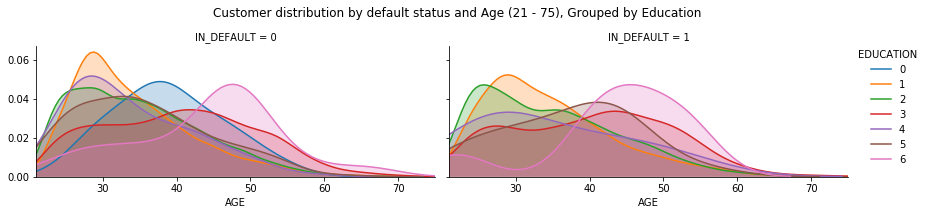

In [66]:
fg = sns.FacetGrid(data=credit, col="IN_DEFAULT", hue='EDUCATION', aspect=2)
fg.map(sns.kdeplot, 'AGE', shade=True)
youngest = in_default['AGE'].min()
oldest = in_default['AGE'].max()
fg.set(xlim=(youngest,oldest))
#fg.set(title='Customer distribution by default status and Age, Grouped by Education')
plt.subplots_adjust(top=0.8)
fg.fig.suptitle('Customer distribution by default status and Age ({start} - {end}), Grouped by Education '.format(start=youngest, end=oldest))
fg.add_legend()

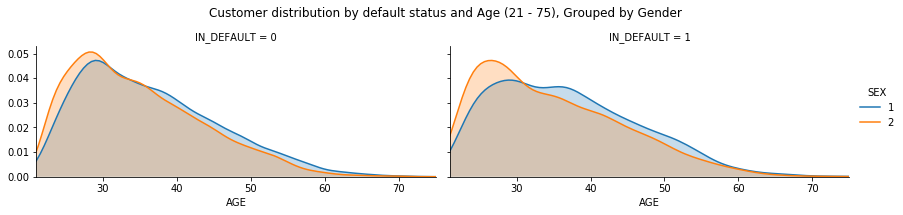

In [67]:
fg = sns.FacetGrid(data=credit, col="IN_DEFAULT",  hue='SEX', aspect=2)
fg.map(sns.kdeplot, 'AGE', shade=True)
youngest = in_default['AGE'].min()
oldest = in_default['AGE'].max()
fg.set(xlim=(youngest,oldest))
#fg.set(title='Customer distribution by default status and Age, Grouped by Gender')
plt.subplots_adjust(top=0.8)
fg.fig.suptitle('Customer distribution by default status and Age ({start} - {end}), Grouped by Gender '.format(start=youngest, end=oldest))
fg.add_legend()